In [ ]:
import sys
import os
import numpy as np
import sktime
from sktime.datasets import load_from_tsfile_to_dataframe# Only add the project root to sys.path
root_path = os.path.abspath('..')
if root_path not in sys.path:
    sys.path.insert(0, root_path)

In [52]:
# x_train = load_from_tsfile_to_dataframe("..//Data//Physio//TEST_X.ts")
pid = np.load("..//Data//Physio//TEST_pid.npy")
print(pid[0])


['P53_N' '1587' '1802' '8']


Found CPS: [1230 1320]
F1 Score: 0.3333333333333333
Covering Score: 0.8488612836438924
True Change Points: [1587, 1802]


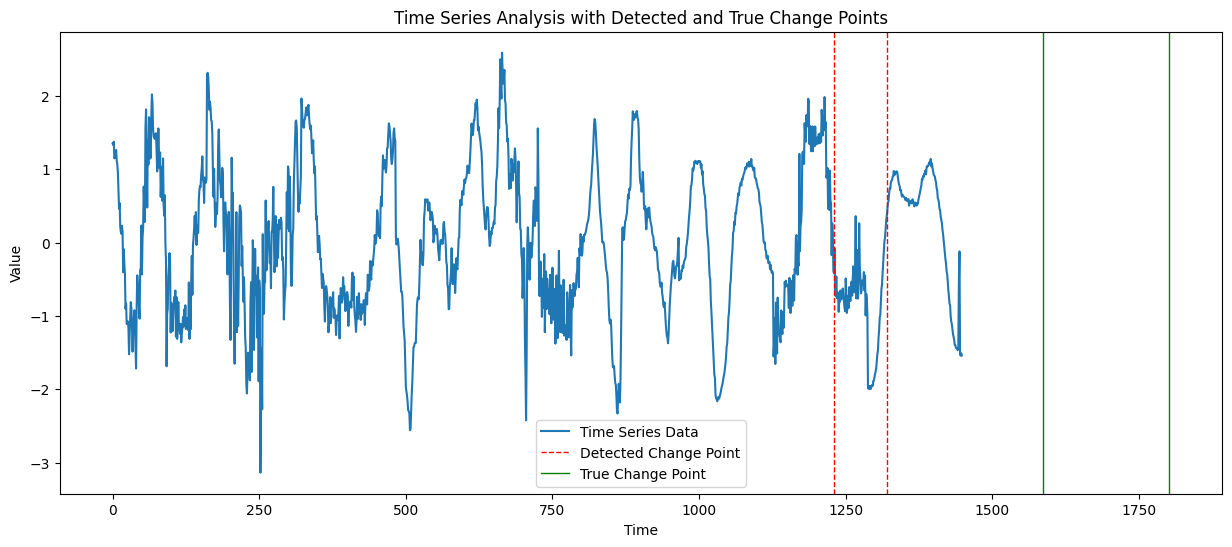

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from Algorithms.binseg import binseg
from Functions.evaluate_binseg import evaluate_binseg
from Functions.metrics import f_measure, covering

# Load the time series data from the uploaded file
ts_file_path = '..//Data//Physio//single_ts.ts'
dataset_name = 'single_ts'
with open(ts_file_path, 'r') as file:
    data = np.array([float(num) for num in file.read().split(',')])
    
# Load the change points from the .npy file
# Make sure to update the file path to where your .npy file is located
npy_file_path = '..//Data//Physio//TEST_pid.npy'
change_points_list = np.load(npy_file_path, allow_pickle=True)

# Filter out non-numeric strings and convert the rest to integers, excluding the last number
true_change_points = [int(point) for point in change_points_list[0][:-1] if point.isdigit()]

# Parameters for the Binseg function
cost_func = "rbf"  # Example cost function
n_cps = len(true_change_points)
detected_cps = binseg(data, n_cps, cost_func)

# Evaluate the detected change points
try:
    dataset, true_cps, detected_cps, f1_score, covering_score = evaluate_binseg(dataset_name, data, true_change_points, cost_func=cost_func)
    print(f"True Change Points: {true_change_points}")
except TypeError as e:
    print(f"An error occurred: {e}")

# Visualization
plt.figure(figsize=(15, 6))
plt.plot(data, label='Time Series Data')
for cp in detected_cps:
    plt.axvline(x=cp, color='red', linestyle='--', linewidth=1, label='Detected Change Point' if cp == detected_cps[0] else "")
for cp in true_change_points:
    plt.axvline(x=cp, color='green', linestyle='-', linewidth=1, label='True Change Point' if cp == true_change_points[0] else "")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Analysis with Detected and True Change Points')
plt.legend()
plt.show()
